# Graded index fiber using the radial solver

In [3]:
import os, sys
sys.path.insert(0,os.path.abspath('../..'))
os.path.abspath('../..')

'/home/spopoff/dev/pyMMF'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pyMMF
from pyMMF.functions import colorize

## 1. Fiber parameters

In [5]:
NA = 0.2
radius = 25 # in microns
areaSize = 2.4*radius # calculate the field on an area larger than the diameter of the fiber
n_points_modes = 256 # resolution of the window
n1 = 1.45 # index of refraction at r=0 (maximum)
wl = 1.55 # wavelength in microns
curvature = None
k0 = 2.*np.pi/wl

r_max = 3.2*radius
npoints_search = 2**8
dh = 2*radius/npoints_search

# solver parameters
solver_options = {
    'degenerate_mode': 'exp', # 'eig' or 'prop'
    'min_radius_bc': 1.5,   # min large radial boundary condition
    'N_beta_coarse': 1_000, # number of steps of the initial coarse scan
    'change_bc_radius_step': 0.95, #change of the large radial boundary condition if fails 
    'dh': dh,               # radial resolution during the computation
    'r_max': r_max,         # max radius to calculate (and first try for large radial boundary condition)
}

## 2. Compute the mode with radial solver

In [6]:
profile = pyMMF.IndexProfile(
    npoints = n_points_modes, 
    areaSize = areaSize
)
profile.initParabolicGRIN(n1=n1, a=radius, NA=NA)

solver = pyMMF.propagationModeSolver()
solver.setIndexProfile(profile)
solver.setWL(wl)


modes = solver.solve(solver='radial',
                    curvature = curvature,
                    options = solver_options
                    )


2024-09-10 13:08:37,330 - pyMMF.core [DEBUG  ]  Debug mode ON.
2024-09-10 13:08:37,331 - pyMMF.solv [INFO   ]  Searching for modes with beta_min=5.821637357564584, beta_max=5.877818513168
2024-09-10 13:08:37,341 - pyMMF.solv [INFO   ]  Found 5 radial mode(s) for m=0
2024-09-10 13:08:37,342 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-09-10 13:08:37,343 - pyMMF.solv [ERROR  ]  Field limit 1.0 at the founded beta=0.05066217542815342 is greater than field_limit_tol=0.001
2024-09-10 13:08:37,343 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-09-10 13:08:37,344 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.04a
2024-09-10 13:08:37,346 - pyMMF.solv [ERROR  ]  Field limit 1.0 at the founded beta=0.05066217542815342 is greater than field_limit_tol=0.001
2024-09-10 13:08:37,346 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-09-10 13:08:37,346 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.89a
2024-09-10 13:08:37,

********************************************************************************
<function IndexProfile.initParabolicGRIN.<locals>.radialFunc at 0x7e9bd0389c60>
<function IndexProfile.initParabolicGRIN.<locals>.radialFunc at 0x7e9bd0389c60>


2024-09-10 13:08:37,490 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.61a
2024-09-10 13:08:37,491 - pyMMF.solv [ERROR  ]  Field limit -0.21784004542161747 at the founded beta=0.039606896670381475 is greater than field_limit_tol=0.001
2024-09-10 13:08:37,492 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-09-10 13:08:37,492 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.48a
2024-09-10 13:08:37,493 - pyMMF.solv [ERROR  ]  Field limit -0.023351419030349846 at the founded beta=0.0396068966703815 is greater than field_limit_tol=0.001
2024-09-10 13:08:37,493 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-09-10 13:08:37,493 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.35a
2024-09-10 13:08:37,494 - pyMMF.solv [ERROR  ]  Field limit -0.0028576150347095954 at the founded beta=0.03960689667038151 is greater than field_limit_tol=0.001
2024-09-10 13:08:37,495 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2024-09-10 13

## 3. Results

### Dispersion

In [7]:
# sort modes by decreasing propagation constant
modes.sort()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 51, 53, 54])

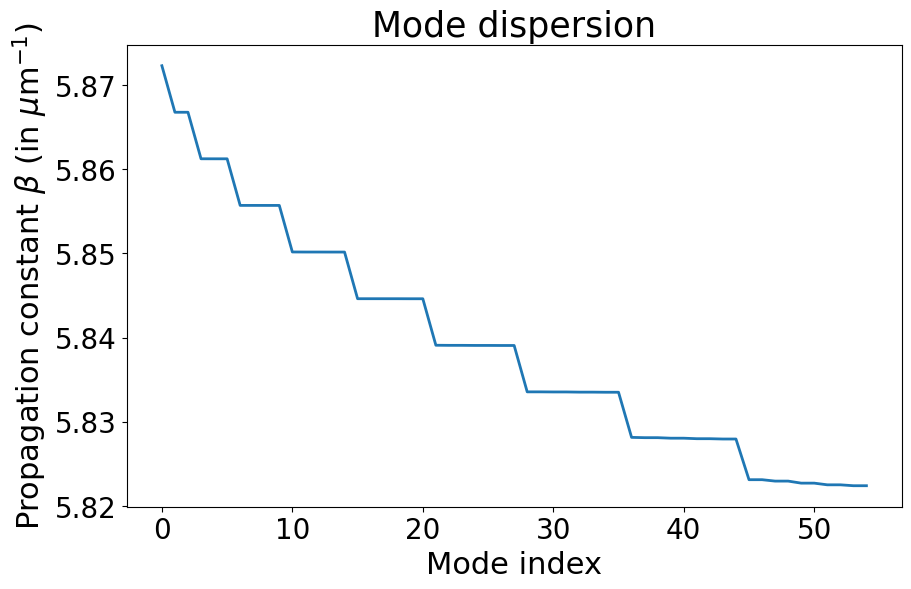

In [8]:
plt.figure(figsize=(10,6)); 
plt.plot((np.real(modes.betas)),
         linewidth=2.)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Mode dispersion' ,fontsize = 25)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 22)
plt.xlabel(r'Mode index', fontsize = 22)
plt.show()

### Display some modes

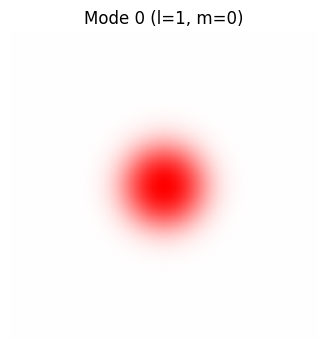

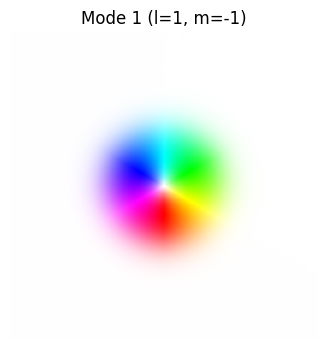

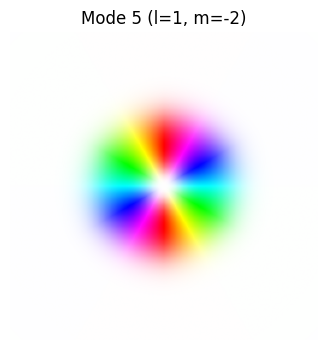

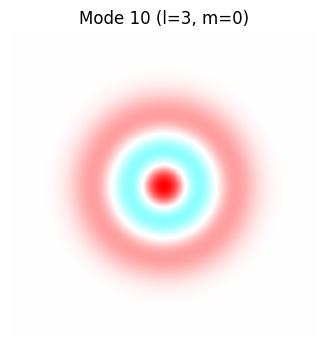

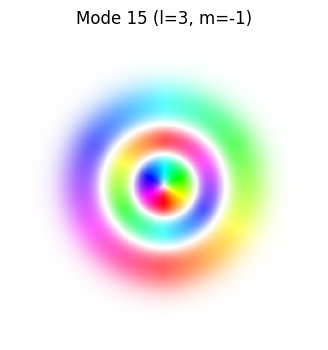

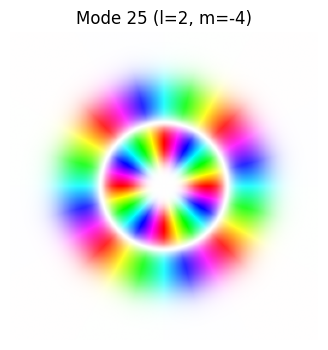

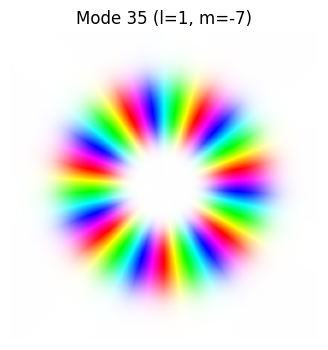

In [9]:
i_modes = [0,1,5,10,15,25,35]

M0 = modes.getModeMatrix()

for i in i_modes:
    Mi = M0[...,i]
    profile_arr = Mi.reshape([n_points_modes]*2)
    plt.figure(figsize = (4,4))
    plt.imshow(colorize(profile_arr,'white'))
    plt.axis('off')
    plt.title(f'Mode {i} (l={modes.l[i]}, m={modes.m[i]})')

## 4. Save the data

In [11]:
params = {}
params['NA'] = NA
params['radius'] = radius # in microns
params['areaSize'] = areaSize # calculate the field on an area larger than the diameter of the fiber
params['n_points_modes'] = n_points_modes # resolution of the window
params['n1'] = n1 # index of refraction at r=0 (maximum)
params['wl'] = wl # wavelength in microns
params['curvature'] = curvature
params['k0'] = k0

params['r_max'] = r_max
params['npoints_search'] = npoints_search
params['dh'] = dh

params['solver_options'] = solver_options
params['solver'] = 'radial'

np.savez('GRIN_test_radial', M0 = M0, params = params, betas = modes.betas)